In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

# **Spatial Aggregation**

1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?


In [29]:
data = pd.read_csv('Data.csv')
max_pm_conc_state = data.groupby('state')['PM2.5'].sum().idxmax()
print(max_pm_conc_state)

Delhi


2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?



In [30]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data_2023 = data[data['Timestamp'].dt.year == 2023]
hazardous_df = data_2023[data_2023['PM2.5'] > 300]
most_hazardous_count = hazardous_df.groupby('state')['Timestamp'].count()
most_hazardous_state = most_hazardous_count.idxmax()
print(most_hazardous_state)

Delhi


3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)


In [31]:
most_hazardous_stations = data_2023.groupby('state')['PM2.5'].max()
least_hazardous_stations = data_2023.groupby('state')['PM2.5'].min()
variability = most_hazardous_stations - least_hazardous_stations
print(variability.idxmax())

# One of the ways of measuring variability is by finding the difference between the highest and lowest value.

Delhi


4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [32]:
covid_data = data[(data['Timestamp'].dt.year >= 2020) & (data['Timestamp'].dt.year <= 2021)]
lowest_covid_pm = covid_data.groupby('state')['PM2.5'].sum().idxmin()
print(lowest_covid_pm)

Himachal Pradesh


# **Temporal Aggregation**

1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [33]:
data_august_2020 = data[(data['Timestamp'].dt.year == 2020) & (data['Timestamp'].dt.month == 8)]
highest_pm_index = data_august_2020['PM2.5'].idxmax()
print(data_august_2020['station'][highest_pm_index])

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.<br>
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?

In [34]:
def seasons(m):
    if m == 12 or m == 1 or m == 2:
        return 'Winter'
    elif m == 3 or m == 4 or m == 5:
        return 'Summer'
    elif m == 6 or m == 7 or m == 8 or m == 9:
        return 'Monsoon'

data['season'] = data['Timestamp'].dt.month.apply(seasons)

df = data[data['Timestamp'].dt.year == 2018].copy()
df['PM2.5'] = df['PM2.5'].fillna(0)

station_data = df[df['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'].groupby('season')['PM2.5'].mean()
print('Average PM2.5 concentration in winter:', station_data['Winter'], 'µg/m^3')
print('Average PM2.5 concentration in monsoon:', station_data['Monsoon'], 'µg/m^3')
print('Average PM2.5 concentration in summer:', station_data['Summer'], 'µg/m^3')

# Pollution is caused mainly due to human activities and also due to some natural events like wildfires. Pollution is affected by environmental factors like temperature, wind speed and direction. Monsoon usually has less pollution than winter and summer because the rain helps to wash out the pollutants. While in winters the pollutants are trapped on the lower level of atomsphere.

Average PM2.5 concentration in winter: 22.497448121149265 µg/m^3
Average PM2.5 concentration in monsoon: 7.900864681712457 µg/m^3
Average PM2.5 concentration in summer: 0.0 µg/m^3


3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:<br>
    a. Calculate the monthly average PM2.5 for weekdays and weekends separately<br>
    b. X-axis: Months (January to December).<br>
    c. Y-axis: Average PM2.5 levels.<br>
    d. Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

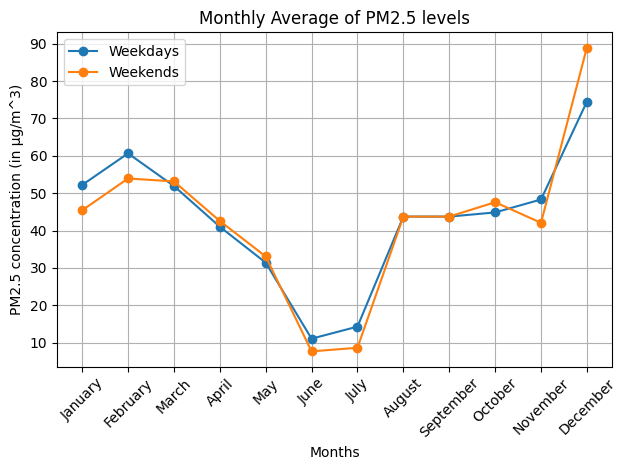

In [35]:
station_data = data[(data['Timestamp'].dt.year == 2021) & (data['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')].copy()
station_data['Day'] = station_data['Timestamp'].dt.dayofweek
station_data['PM2.5'] = station_data['PM2.5'].fillna(station_data['PM2.5'].median())
weekday_data = station_data[station_data['Day'] < 5]
weekend_data = station_data[station_data['Day'] >= 5]
weekday_mean = weekday_data.groupby(weekday_data['Timestamp'].dt.month)['PM2.5'].mean()
weekend_mean  = weekend_data.groupby(weekend_data['Timestamp'].dt.month)['PM2.5'].mean()

fig, ax = plt.subplots()
plt.plot(weekday_mean, marker='o', label='Weekdays')
plt.plot(weekend_mean, marker='o', label='Weekends')
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.tick_params("x", rotation=45)
ax.set_title('Monthly Average of PM2.5 levels')
ax.set_xlabel('Months')
ax.set_ylabel('PM2.5 concentration (in µg/m^3)')
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()

# **Spatio-Temporal Aggregation**

1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [36]:
data_2022 = data[data['Timestamp'].dt.year == 2022]
monsoon_data = data_2022[data_2022['season'] == 'Monsoon'].groupby('state')['PM2.5'].mean()
summer_data = data_2022[data_2022['season'] == 'Summer'].groupby('state')['PM2.5'].mean()
pm_diff = monsoon_data - summer_data

if pm_diff[np.abs(pm_diff).idxmax()] > 0:
    print(f'{np.abs(pm_diff).max()}% increase in {np.abs(pm_diff).idxmax()}')
else:
    print(f'{np.abs(pm_diff).max()}% decrease in {np.abs(pm_diff).idxmax()}')


52.89805551280523% decrease in Delhi


2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

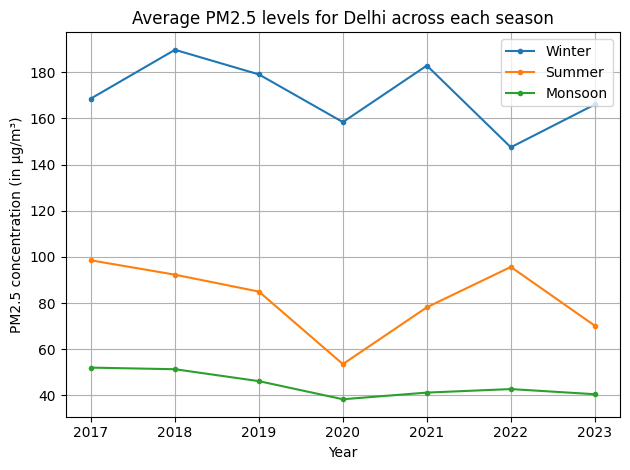

In [37]:
delhi_data = data[(data['state'] == 'Delhi') & (data['Timestamp'].dt.year <= 2023) & (data['Timestamp'].dt.year >= 2017)]
winter_data = delhi_data[delhi_data['season'] == 'Winter'].groupby(delhi_data['Timestamp'].dt.year)['PM2.5'].mean()
summer_data = delhi_data[delhi_data['season'] == 'Summer'].groupby(delhi_data['Timestamp'].dt.year)['PM2.5'].mean()
monsoon_data = delhi_data[delhi_data['season'] == 'Monsoon'].groupby(delhi_data['Timestamp'].dt.year)['PM2.5'].mean()

plt.plot(winter_data, marker='.', label='Winter')
plt.plot(summer_data, marker='.', label='Summer')
plt.plot(monsoon_data, marker='.', label='Monsoon')
plt.legend(loc = 'upper right')
plt.xlabel('Year')
plt.ylabel('PM2.5 concentration (in µg/m³)')
plt.title('Average PM2.5 levels for Delhi across each season')
plt.grid()
plt.tight_layout()
plt.show()
# Pollution levels are highest in winter, followed by summer and monsoon seasons, where rain helps in reducing pollution by washing out pllutants.


3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

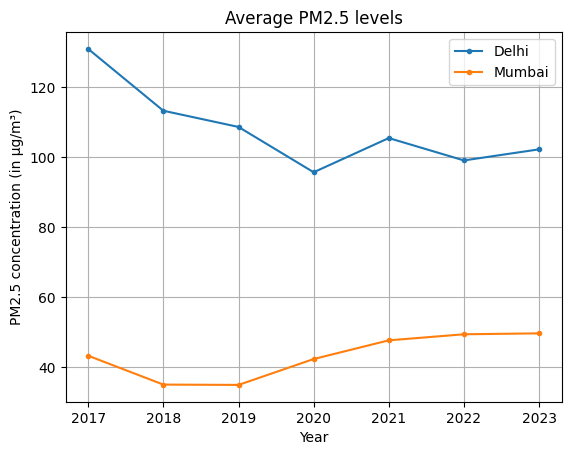

In [38]:
delhi_data = data[(data['state'] == 'Delhi') & (2015 <= data['Timestamp'].dt.year) & (data['Timestamp'].dt.year <= 2023)]
mumbai_data = data[(data['city'] == 'Mumbai') & (2015 <= data['Timestamp'].dt.year) & (data['Timestamp'].dt.year <= 2023)]


plt.plot(delhi_data.groupby(delhi_data['Timestamp'].dt.year)['PM2.5'].mean(), marker = '.', label = 'Delhi')
plt.plot(mumbai_data.groupby(mumbai_data['Timestamp'].dt.year)['PM2.5'].mean(), marker = '.', label='Mumbai')
plt.legend()
plt.xlabel('Year')
plt.ylabel('PM2.5 concentration (in µg/m³)')
plt.title('Average PM2.5 levels')
plt.grid()
plt.show()

# Delhi had more fluctuations because the PM2.5 levels in Mumbai showed a stable gradual increase while in Delhi the levels showed a drastic diffrence in PM2.5 levels over the years.

# **Population-Based**

1. Which state in India has the highest number of monitoring stations relative to its population?

In [39]:
data1 = pd.read_csv("Data.csv")
data2 = pd.read_csv("State_data.csv")

a = data1.groupby("state")["address"].count().reset_index()
a.columns = ["state", "stations"]

b = data2.groupby("State")["Population"].sum().reset_index()

merged = pd.merge(a, b, left_on="state", right_on="State")
merged["stations_per_person"] = merged["stations"] / merged["Population"]

highest_state = merged.loc[merged["stations_per_person"].idxmax()]
print("State with highest monitoring stations relative to population:")
print(highest_state[["state", "stations_per_person"]])

State with highest monitoring stations relative to population:
state                  Chandigarh
stations_per_person      0.008246
Name: 4, dtype: object


Answer: According to the output given by the above code, the state with highest monitoring stations relative to population is Chandigarh.

2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

                State  PM2.5_Per_Capita
4          Chandigarh          0.000054
24             Sikkim          0.000022
21         Puducherry          0.000018
19           Nagaland          0.000017
1   Arunachal Pradesh          0.000016


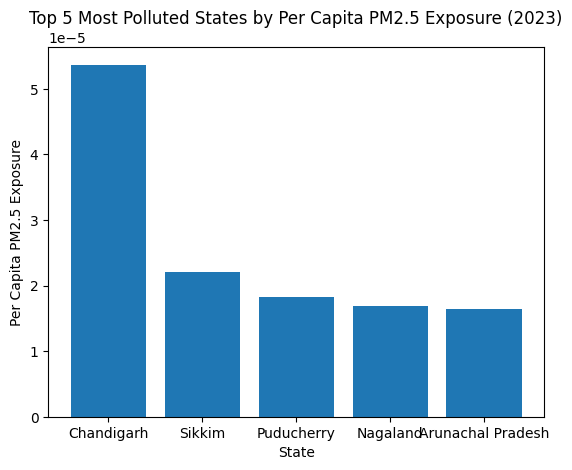

In [40]:
data1 = pd.read_csv("Data.csv")
data2 = pd.read_csv("State_data.csv")
a = data1.groupby("state")["PM2.5"].mean().reset_index()

b = data2.groupby("State")["Population"].sum().reset_index()

c = pd.merge(a, b, left_on = "state", right_on = "State")
c["PM2.5_Per_Capita"] = c["PM2.5"]/c["Population"]

Top_5_Most_Polluted_States = c.sort_values(by = "PM2.5_Per_Capita", ascending = False).head()

print(Top_5_Most_Polluted_States[["State", "PM2.5_Per_Capita"]])

plt.figure()
plt.bar(Top_5_Most_Polluted_States["State"], Top_5_Most_Polluted_States["PM2.5_Per_Capita"])
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States by Per Capita PM2.5 Exposure (2023)")
plt.show()

3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?<br>
    a. X-axis: Population density (people per square kilometer).<br>
    b. Y-axis: Average PM2.5 concentration.<br>
    c. Use a scatter plot to show the relationship, where each point represents a state.

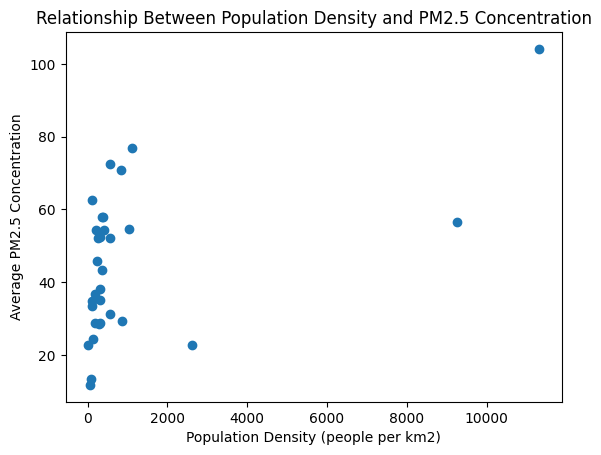

In [41]:
data1 = pd.read_csv("Data.csv")
data2 = pd.read_csv("State_data.csv")

a = data1.groupby("state")["PM2.5"].mean().reset_index()

b = data2.groupby("State")["Population"].sum().reset_index()
c = data2.groupby("State")["Area (km2)"].sum().reset_index()

d = pd.merge(a, b, left_on = "state", right_on = "State")
d = pd.merge(d, c, on="State")

d["Population_density"] = d["Population"]/d["Area (km2)"]
d["Average_PM2.5_conc"] = d["PM2.5"]

plt.figure()
plt.scatter(d["Population_density"], d["Average_PM2.5_conc"])
plt.xlabel("Population Density (people per km2)")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Relationship Between Population Density and PM2.5 Concentration")

# for i, row in d.iterrows():
#     plt.text(row["Population_density"], row["Average_PM2.5_conc"], row["State"], fontsize=5)

plt.show()

Answer: We can observe that very high population density may lead to higher pollution levels. But the overall trend does not show a clear linear relationship. So there might be other environmental and human factors playing a significant role in determining pollution levels.









# **Area Based**

1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.<br>
    a. X-axis: States.<br>
    b. Y-axis: PM2.5 concentration per square kilometer.<br>
    c. Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

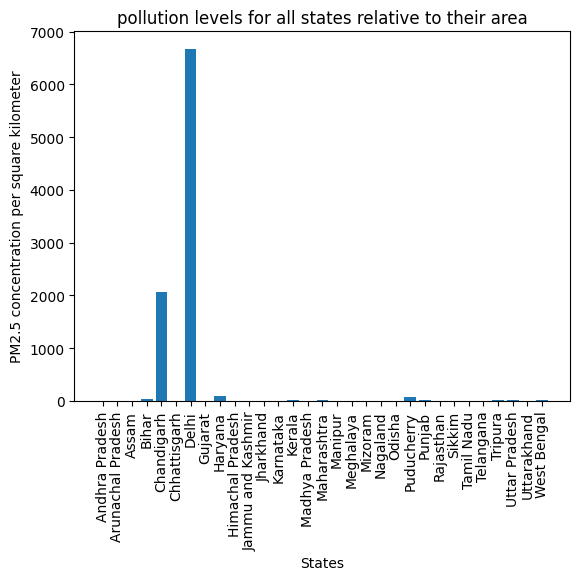

In [42]:
data1 = pd.read_csv("Data.csv")
data2 = pd.read_csv("State_data.csv")

a = data1.groupby("state")["PM2.5"].sum().reset_index()
b = data2.groupby("State")["Area (km2)"].sum().reset_index()

c = pd.merge(a, b, left_on = "state", right_on = "State")

c["PM2.5 Conc per sq km"] = c["PM2.5"]/c["Area (km2)"]

plt.figure()
plt.bar(c["state"], c["PM2.5 Conc per sq km"])
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("PM2.5 concentration per square kilometer")
plt.title("pollution levels for all states relative to their area")

plt.show()

Delhi has the highest PM2.5 concentration per square kilometer.

2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

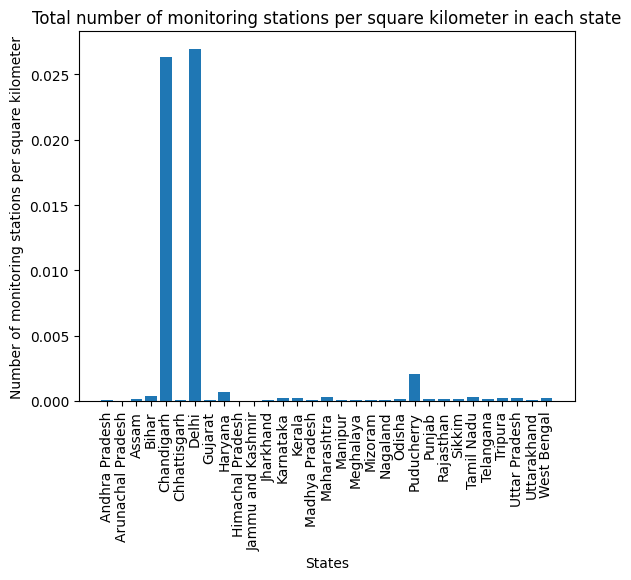

In [43]:
data1 = pd.read_csv("Data.csv")
data2 = pd.read_csv("State_data.csv")


a = data1.groupby("state")["station"].nunique().reset_index()
b = data2.groupby("State")["Area (km2)"].sum().reset_index()

c = pd.merge(a, b, left_on = "state", right_on = "State")
c["Tot_stations_per_sq_km"] = c["station"]/c["Area (km2)"]

plt.figure()
plt.bar(c["state"], c["Tot_stations_per_sq_km"])
plt.xlabel("States")
plt.xticks(rotation = 90)
plt.ylabel("Number of monitoring stations per square kilometer")
plt.title("Total number of monitoring stations per square kilometer in each state")

plt.show()

Answer: The state with highest density of monitoring stations relative to its area is Delhi.

3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [44]:
data1 = pd.read_csv("Data.csv")
data2 = pd.read_csv("State_data.csv")

data1["Timestamp"] = pd.to_datetime(data1["Timestamp"], format="%Y-%m-%d")
data_2021 = data1[data1["Timestamp"].dt.year == 2021]

a = data_2021.groupby("state")["PM2.5"].mean().reset_index()

b = data2.groupby("State")["Population"].sum().reset_index()
c = data2.groupby("State")["Area (km2)"].sum().reset_index()

d = pd.merge(a, b, left_on = "state", right_on = "State")
d = pd.merge(d, c, on="State")

d["Population_density"] = d["Population"]/d["Area (km2)"]

wanted = ["Maharashtra", "Madhya Pradesh"]
check_if = d["state"].isin(wanted)

e = d[check_if]

print(e[["state", "PM2.5", "Population_density"]])

             state      PM2.5  Population_density
14  Madhya Pradesh  47.095952          235.608557
15     Maharashtra  46.440044          365.192023


Answer: While Madhya Pradesh and Maharashtra have similar land areas, Maharashtra has a significantly higher population density. However, their PM2.5 pollution levels are nearly the same, indicating that population density alone does not directly affect air pollution levels. Other factors like industrial activity, geographical conditions, transportation emissions, and environmental regulations likely have a bigger impact.

# **Funding Based**

1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [45]:
pm25_df = pd.read_csv("Data.csv")
ncap_df = pd.read_csv("NCAP_Funding.csv")
funding_column = "Amount released during FY 2021-22"
ncap_df = ncap_df[ncap_df[funding_column].astype(str) != "-"]
funded_states = set(ncap_df["State"])
pm25_df["received_funding"] = pm25_df["state"].isin(funded_states)
avg_pm25_funded = pm25_df[pm25_df["received_funding"] == True]["PM2.5"].mean()
avg_pm25_non_funded = pm25_df[pm25_df["received_funding"] == False]["PM2.5"].mean()
print(f"Average PM2.5 Level (Funded States): {avg_pm25_funded:.2f}")
print(f"Average PM2.5 Level (Non-Funded States): {avg_pm25_non_funded:.2f}")


Average PM2.5 Level (Funded States): 62.07
Average PM2.5 Level (Non-Funded States): 52.87


2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

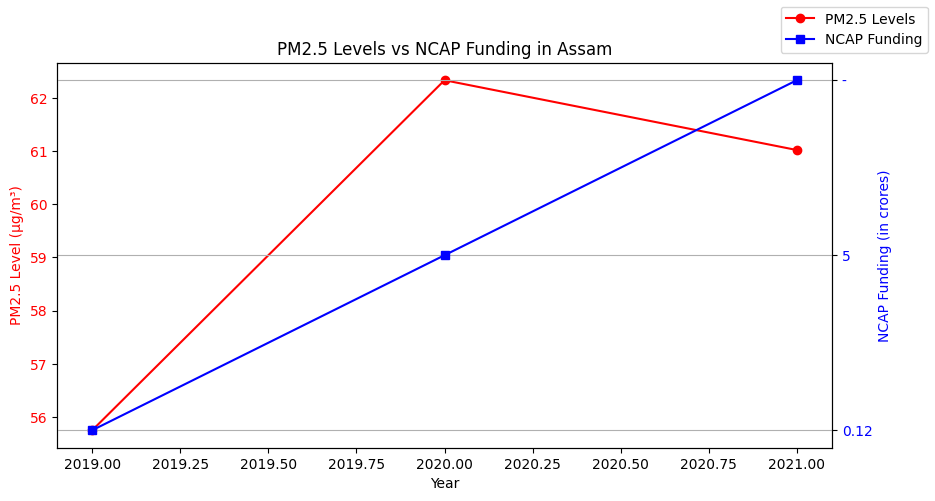

In [46]:
pm25_df = pd.read_csv("data.csv")
ncap_df = pd.read_csv("NCAP_Funding.csv")
pm25_df["Timestamp"] = pd.to_datetime(pm25_df["Timestamp"])
pm25_df["Year"] = pm25_df["Timestamp"].dt.year
pm25_assam = pm25_df[pm25_df["state"] == "Assam"].groupby("Year")["PM2.5"].mean().reset_index()
ncap_assam = ncap_df[ncap_df["State"] == "Assam"]
funding_data = pd.DataFrame({
    "Year": [2019, 2020, 2021],
    "Funding": [
        ncap_assam["Amount released during FY 2019-20"].values[0],
        ncap_assam["Amount released during FY 2020-21"].values[0],
        ncap_assam["Amount released during FY 2021-22"].values[0]
    ]
})
merged_df = pd.merge(pm25_assam, funding_data, on="Year", how="inner")
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(merged_df["Year"], merged_df["PM2.5"], color="red", marker="o", label="PM2.5 Levels")
ax1.set_xlabel("Year")
ax1.set_ylabel("PM2.5 Level (µg/m³)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax2 = ax1.twinx()
ax2.plot(merged_df["Year"], merged_df["Funding"], color="blue", marker="s", label="NCAP Funding")
ax2.set_ylabel("NCAP Funding (in crores)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")
plt.title("PM2.5 Levels vs NCAP Funding in Assam")
fig.legend(loc="upper right")
plt.grid()
plt.show()


3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

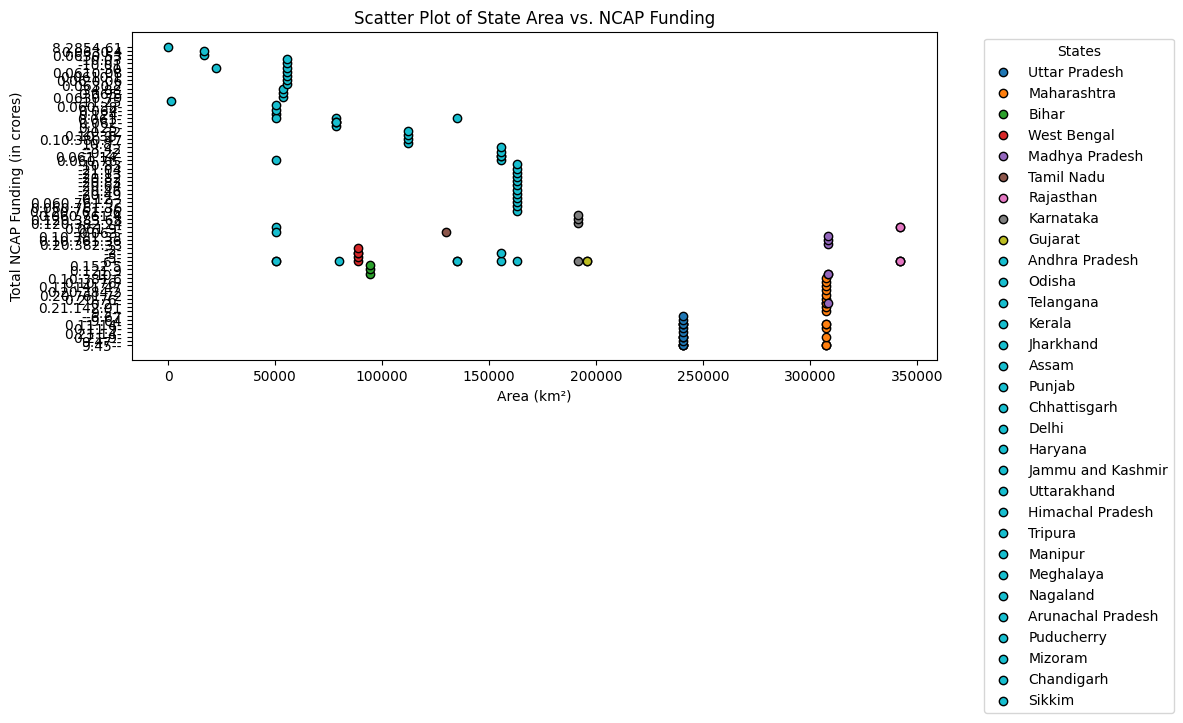

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
funding_df = pd.read_csv("NCAP_Funding.csv")
area_df = pd.read_csv("state_data.csv")
area_df.rename(columns={"Area (km2)": "Area"}, inplace=True)
funding_df["Total_Funding"] = (
    funding_df["Amount released during FY 2019-20"].fillna(0) +
    funding_df["Amount released during FY 2020-21"].fillna(0) +
    funding_df["Amount released during FY 2021-22"].fillna(0)
)

merged_df = area_df.merge(funding_df, on="State", how="left")

states = merged_df["State"].unique()
colors = plt.cm.tab10(range(len(states)))
state_color_map = {state: colors[i] for i, state in enumerate(states)}

plt.figure(figsize=(12, 6))

for state in states:
    subset = merged_df[merged_df["State"] == state]
    plt.scatter(subset["Area"], subset["Total_Funding"], color=state_color_map[state], label=state, edgecolors="black")

plt.xlabel("Area (km²)")
plt.ylabel("Total NCAP Funding (in crores)")
plt.title("Scatter Plot of State Area vs. NCAP Funding")
plt.legend(title="States", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


# **Miscellaneous Questions**

1.  For the most polluted city in 2023 (highest average pollution in 2023), calculate the
percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)[

In [48]:
most_polluted_city = data_2023.groupby('city')['PM2.5'].mean().idxmax()
most_polluted_city_data = data_2023[data_2023['city'] == most_polluted_city]
hazardous_days = most_polluted_city_data[most_polluted_city_data['PM2.5']>300]['Timestamp'].count()
non_hazardous_days = most_polluted_city_data[most_polluted_city_data['PM2.5']<=300]['Timestamp'].count()
percentage_hazardous_days = 100*(hazardous_days)/(hazardous_days + non_hazardous_days)
print(f'{percentage_hazardous_days}%')

23.076923076923077%


2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year
compared to regular months over the 3 years (2018-2020). Do you observe any
significant pollution spikes during these festivals? If spikes are observed, Can you mark
these spikes using arrows?

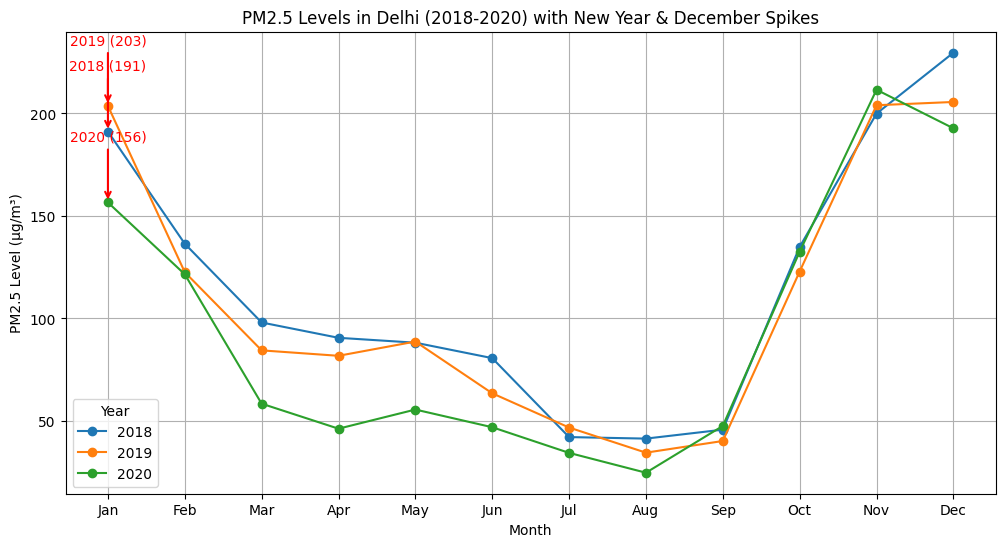

In [49]:
pm25_df = pd.read_csv("data.csv")
pm25_df["Timestamp"] = pd.to_datetime(pm25_df["Timestamp"])
pm25_df["Year"] = pm25_df["Timestamp"].dt.year
pm25_df["Month"] = pm25_df["Timestamp"].dt.month
pm25_df["Day"] = pm25_df["Timestamp"].dt.day
pm25_delhi = pm25_df[pm25_df["state"] == "Delhi"]

monthly_avg_pm25 = pm25_delhi.groupby(["Year", "Month"])["PM2.5"].mean().reset_index()
new_year_months = [1]
diwali_months = [10, 11]
winter_spike_months = [12]

spike_points = []
for year in [2018, 2019, 2020]:
        winter_avg = monthly_avg_pm25[
        (monthly_avg_pm25["Year"] == year) & (monthly_avg_pm25["Month"].isin(winter_spike_months + new_year_months))]["PM2.5"].mean()
        yearly_avg = monthly_avg_pm25[monthly_avg_pm25["Year"] == year]["PM2.5"].mean()
        for month in [12, 1]:
            monthly_pm25 = monthly_avg_pm25[
            (monthly_avg_pm25["Year"] == year) & (monthly_avg_pm25["Month"] == month)
        ]["PM2.5"].mean()
        if monthly_pm25 > yearly_avg * 1.2:
            spike_points.append((year, month, monthly_pm25))

plt.figure(figsize=(12, 6))
for year in [2018, 2019, 2020]:
    yearly_data = monthly_avg_pm25[monthly_avg_pm25["Year"] == year]
    plt.plot(yearly_data["Month"], yearly_data["PM2.5"], marker="o", label=f"{year}")
for year, month, pm25_value in spike_points:
    offset = 40 if month == 12 else 30
    plt.annotate(
        f"{year} ({int(pm25_value)})",
        xy=(month, pm25_value),
        xytext=(month, pm25_value + offset),
        arrowprops=dict(arrowstyle="->", color="red", lw=1.5),
        fontsize=10,
        color="red",
        ha="center"
    )
plt.xlabel("Month")
plt.ylabel("PM2.5 Level (µg/m³)")
plt.title("PM2.5 Levels in Delhi (2018-2020) with New Year & December Spikes")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid()
plt.show()


3.  Identify the state that received the highest NCAP funding in 2020 and determine if its air
pollution levels improved significantly by 2023. Use a line graph to compare yearly
average PM2.5 trends.

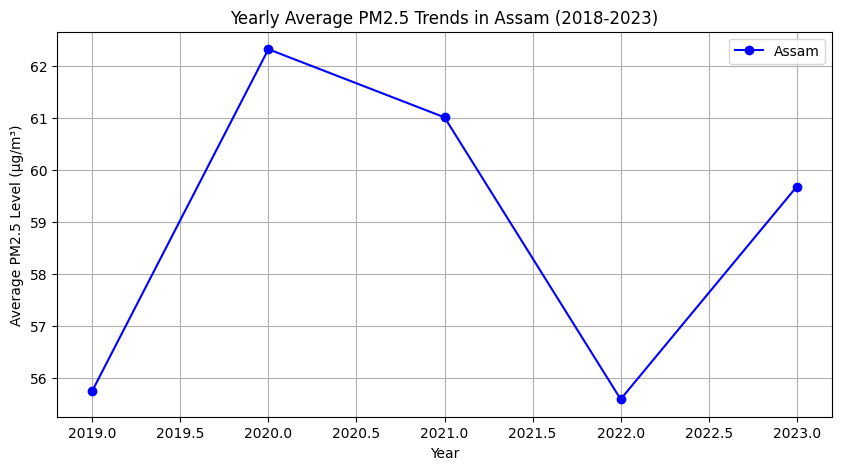

In [50]:
funding_df = pd.read_csv("NCAP_Funding.csv")
pm25_df = pd.read_csv("data.csv")

highest_funded_state = funding_df.loc[
    funding_df["Amount released during FY 2020-21"].idxmax(), "State"
]

pm25_df["Timestamp"] = pd.to_datetime(pm25_df["Timestamp"])
pm25_df["Year"] = pm25_df["Timestamp"].dt.year

state_pm25 = pm25_df[pm25_df["state"] == highest_funded_state]

yearly_avg_pm25 = state_pm25.groupby("Year")["PM2.5"].mean().reset_index()

yearly_avg_pm25 = yearly_avg_pm25[(yearly_avg_pm25["Year"] >= 2018) & (yearly_avg_pm25["Year"] <= 2023)]

plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_pm25["Year"], yearly_avg_pm25["PM2.5"], marker="o", linestyle="-", color="blue", label=highest_funded_state)
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level (µg/m³)")
plt.title(f"Yearly Average PM2.5 Trends in {highest_funded_state} (2018-2023)")
plt.grid()
plt.legend()
plt.show()


4. Draw the map of India and plot the sensor locations on the map.

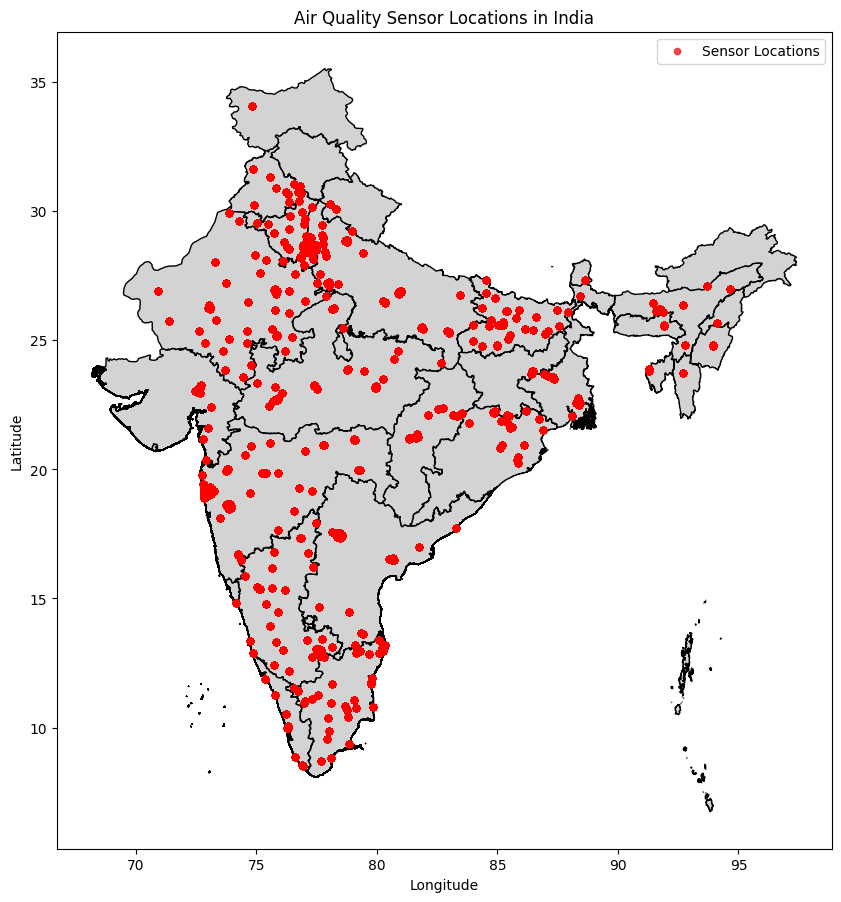

In [51]:
india_map = gpd.read_file("india_state.geojson")
df = pd.read_csv("data.csv")

fig, ax = plt.subplots(figsize=(10, 12))
india_map.plot(ax=ax, color="lightgrey", edgecolor="black")

plt.scatter(df["longitude"], df["latitude"], color="red", s=20, label="Sensor Locations", alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Air Quality Sensor Locations in India")
plt.legend()
plt.show()


# **Tell us something new**

1. Tell us something interesting from the dataset that we have not asked. Anything that
intrigues you, anything that might be useful to the policymakers.  

1. The provided PMI data, shows month-wise that during which months the pollution is at its peak.
2. It also shows the effect of COVID-19 During the year 2019-2020, how drastically it affected the level of pollution, from which we can infer about the major sources contributing for pollution.
3. By seeing that more NCAP funding and proper execution of policies in some states lead to relatively low pollution, the same strategies can be applied to other states.
4. By observing Density VS Population visualization, places that require urgent intervention can be identified.